# Decision Tree.................................................@suyashi Kharola

- Decisions on Classification & Prediction
- As name implies an algo to approach on decision through tree like structures
- A decision tree is drawn upside down with its root at the top
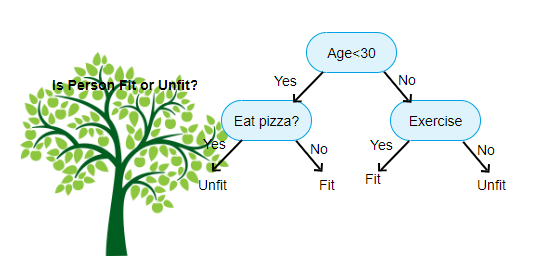

## Construction of Decision Tree

- A Decision tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. 
- The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. 
- The construction of decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery

### Types of decision trees

- Categorical Variable Decision Tree: Decision Tree which has categorical target variable then it called as categorical variable decision tree.

- Continuous Variable Decision Tree: Decision Tree which has continuous target variable then it is called as Continuous Variable Decision Tree.

## Basic terminoligies with decision tree

- Root Node: It represents entire population or sample and this further gets divided into two or more homogeneous sets.
- Splitting: It is a process of dividing a node into two or more sub-nodes.
- Decision Node: When a sub-node splits into further sub-nodes, then it is called decision node.
- Leaf/ Terminal Node: Nodes with no children (no further split) is called Leaf or Terminal node.
- Pruning: When we reduce the size of decision trees by removing nodes (opposite of Splitting), the process is called pruning.
- Branch / Sub-Tree: A sub section of decision tree is called branch or sub-tree.
- Parent and Child Node: A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

## Algorithm used in decision trees:
- ID3 : uses **Entropy** and **Information Gain** to construct a decision tree.
 If the sample is completely homogeneous the entropy is zero and if the sample is equally divided then it has entropy of one.
 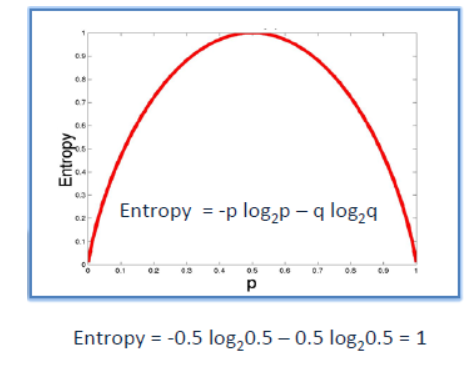
 
- Gini Index : Gini index says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.

    - It works with categorical target variable “Success” or “Failure”.
    - It performs only Binary splits
    - Higher the value of Gini higher the homogeneity.
    - CART (Classification and Regression Tree) uses Gini method to create binary splits.
   
   ## Steps to Calculate Gini for a split

   - Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (p²+q²).
  -  Calculate Gini for split using weighted Gini score of each node of that split

- Chi-Square
   
    - It is an algorithm to find out the statistical significance between the differences between sub nodes and parent node. 
    - We measure it by sum of squares of standardised differences between observed and expected frequencies of target variable.
     
   ## Steps to Calculate Chi-square for a split:

   - Calculate Chi-square for individual node by calculating the deviation for Success and Failure both
   - Calculated Chi-square of Split using Sum of all Chi-square of success and Failure of each node of the split
        
- Reduction in Variance : Reduction in variance is an algorithm used for continuous target variables (regression problems). 
   
    ## Steps to calculate Variance:

  - Calculate variance for each node.
  - Calculate variance for each split as weighted average of each node variance.

 

## The strengths of decision tree methods are:

- Can   generate understandable rules.
- Perform classification without requiring much computation.
- Can to handle both continuous and categorical variables.
- Provide a clear indication of which fields are most important for prediction or classification.
-  It works for both continuous as well as categorical output variables

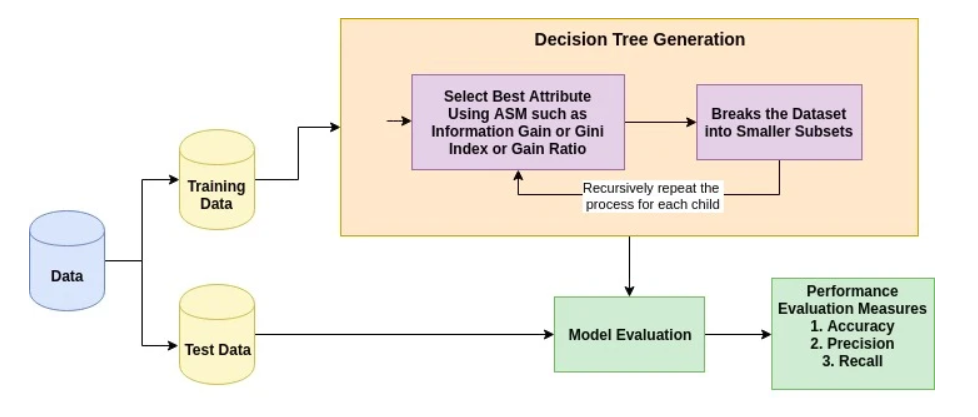

## About Data
Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.



In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
bd=pd.read_csv("F:\\ML & Data Visualization\\bill_authentication.csv")

In [3]:
bd.shape

(1372, 5)

In [4]:
bd.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Data Preparation
-  Divide  data into attributes and labels and will then divide the resultant data into both training and test sets. 
- By doing this we can train our algorithm on one set of data and then test it out on a completely different set of data that the algorithm hasn't seen yet. 

In [5]:
## To divide data into attributes and labels, execute the following code:

X = bd.drop('Class', axis=1)  
y = bd['Class']  


-  X variable contains all the columns from the dataset, except the "Class" column, which is the label. 
- y variable contains the values from the "Class" column. The X variable is our attribute set and y variable contains corresponding labels.

#### The final preprocessing step is to divide our data into training and test sets. The model_selection library of Scikit-Learn contains train_test_split method, which we'll use to randomly split the data into training and testing sets. 

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

#### Test_size parameter specifies the ratio of the test set, which we use to split up 20% of the data in to the test set and 80% for training.

## Training and Making Predictions

- Once the data has been divided into the training and testing sets, the final step is to train the decision tree algorithm on this data and make predictions. 
- Scikit-Learn contains the tree library, which contains built-in classes/methods for various decision tree algorithms. Since we are going to perform a classification task here, we will use the DecisionTreeClassifier class for this example. 
- The fit method of this class is called to train the algorithm on the training data, which is passed as parameter to the fit method.

In [7]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

- Now that our classifier has been trained, let's make predictions on the test data. 
#### To make predictions, the predict method of the DecisionTreeClassifier class is used. 

In [8]:
y_pred = classifier.predict(X_test)  
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

## Classification Rate/Accuracy:
Classification Rate or Accuracy is given by the relation:

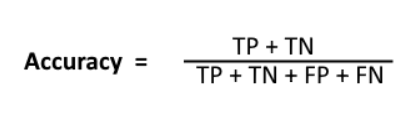

## Evaluating the Algorithm
- Now as we have trained our algorithm and made some predictions. Now we'll see how accurate our algorithm is. 
- For classification tasks some commonly used metrics are confusion matrix, precision, recall, and F1 score. 
- Scikit=-Learn's metrics library contains the classification_report and confusion_matrix methods that can be used to calculate these metrics 

  ### Confusion Matrix
  
  - A confusion matrix is a summary of prediction results on a classification problem.
  - The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
  - The confusion matrix shows the ways in which your classification model is confused when it makes predictions.

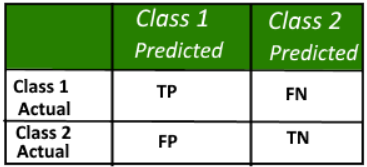

In [9]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9927272727272727


## Recall
- Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (small number of FN).
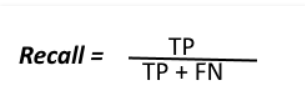

## Precision:
- To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive (small number of FP).

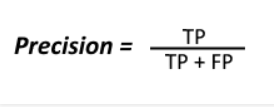

    - High recall, low precision:This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

    - Low recall, high precision:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP).

## F-measure:
    - Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more.
   The F-Measure will always be nearer to the smaller value of Precision or Recall.
   
   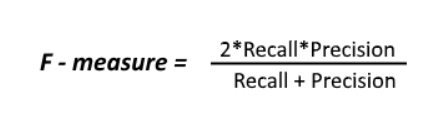

In [10]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[157   1]
 [  1 116]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       158
           1       0.99      0.99      0.99       117

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



## Conclusion 

From the confusion matrix, you can see that out of 275 test instances, our algorithm misclassified only 2. This is 99 % accuracy. 